# Basic EDA for Price and Volume Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


class VisualEDA:
    @staticmethod
    def DesTable(df: pd.DataFrame):
        return df.describe().T
    
    @staticmethod
    def DesBoxplot(df: pd.DataFrame):
        return df.plot(kind='density', subplots=True, layout=(8, 4), figsize=(20, 20), sharex=False)
    
    @staticmethod
    def PlotTrend(X: pd.DataFrame, y: pd.DataFrame):
        df = X.copy()
        df['y'] = y
        return df.plot(x = X.columns[0], y = "y", kind='scatter', figsize=(4, 4))
    
    @staticmethod
    def CountNa(X: pd.DataFrame):
        return X.isna().sum(axis=0)
    
    @staticmethod
    def ReportNa(na_number: pd.Series):
        plot = na_number.plot()
        na_variables = na_number > 0
        na_num = na_variables.sum()
        print("{} out of all variables have NaN.".
              format(na_num))
        print("5 variables with the most NaN:\n\n",
              na_number.sort_values(ascending=False).head())
        return plot
    
    @staticmethod
    def OutlierPlot(X_train, n_std=3):
        temp = X_train.describe().T[["mean", "max", "min", "std"]]
        temp['max'] = (temp['max'] - temp['mean']) / temp['std']
        temp['min'] = (temp['min'] - temp['mean']) / temp['std']
        temp['std_down'], temp['std_up'] = -n_std, n_std
        return temp[['max', 'min', 'std_down', 'std_up']].plot()
    
    @staticmethod
    def OutlierPercentage(X_train, n_std=3):
        temp = ((X_train - X_train.mean()) / X_train.std()).abs()
        temp = (temp > n_std)
        temp = temp.sum() / temp.count()
        print("Highest outlier percentage defined by >= {b} std is {a: .4f}.".format(a=temp.max(), b=n_std))
        print("Lowest outlier percentage defined by >= {b} std is {a: .4f}.\n".format(a=temp.min(), b=n_std))
        print("5 variables with largest percentage of outliers:\n")
        print(temp.sort_values(ascending=False).head())
        return temp.plot()
    
    @staticmethod
    def CorrelationShow(X_train):
        return X_train.corr().round(2)

In [2]:
def ColSelector(df: pd.DataFrame, series=None, toker_list=None):
    cols = df.columns
    res = []
    if series and toker_list:
        res = [x for x in cols if x.split('-')[0] in toker_list and x.split('-')[1] in series]
    elif series:
        res = [x for x in cols if x.split('-')[1] in series]
    elif toker_list:
        res = [x for x in cols if x.split('-')[0] in toker_list]
    return res    

In [3]:
table = pd.read_csv("./price_vol.csv", index_col=0)
table

,ADA-low,ADA-high,ADA-volume,ADA-open,ADA-close,ALGO-low,ALGO-high,ALGO-volume,ALGO-open,ALGO-close,...,XRP-low,XRP-high,XRP-volume,XRP-open,XRP-close,XTZ-low,XTZ-high,XTZ-volume,XTZ-open,XTZ-close
2020-09-26 00:00:00+00:00,0.096892,0.099498,0.0,0.096892,0.098289,NaN,NaN,NaN,NaN,NaN,...,0.241879,0.244077,0.0,0.241888,0.243394,NaN,NaN,NaN,NaN,NaN
2020-09-26 01:00:00+00:00,0.098039,0.099185,0.0,0.098294,0.099047,NaN,NaN,NaN,NaN,NaN,...,0.243195,0.244752,14832768.0,0.243373,0.244366,NaN,NaN,NaN,NaN,NaN
2020-09-26 02:00:00+00:00,0.096829,0.099019,0.0,0.098984,0.096829,NaN,NaN,NaN,NaN,NaN,...,0.243415,0.244747,12609024.0,0.244331,0.244631,NaN,NaN,NaN,NaN,NaN
2020-09-26 03:00:00+00:00,0.095597,0.096975,2912704.0,0.096785,0.095623,NaN,NaN,NaN,NaN,NaN,...,0.244516,0.245595,13346944.0,0.244791,0.244598,NaN,NaN,NaN,NaN,NaN
2020-09-26 04:00:00+00:00,0.094895,0.095818,6723968.0,0.095611,0.095363,NaN,NaN,NaN,NaN,NaN,...,0.243700,0.244766,8772096.0,0.244463,0.244170,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25 00:00:00+00:00,0.451490,0.454639,1261952.0,0.451560,0.454176,0.379394,0.392347,5011120.0,0.384171,0.392347,...,0.483836,0.489918,2641664.0,0.488732,0.485429,1.477692,1.492775,286996.0,1.478441,1.492775
2022-09-25 01:00:00+00:00,0.452166,0.454080,1094592.0,0.454080,0.453118,0.388882,0.395439,13752832.0,0.393055,0.389927,...,0.482285,0.485739,7360256.0,0.485426,0.482613,1.486390,1.494579,590622.0,1.494475,1.487767
2022-09-25 02:00:00+00:00,0.453011,0.454661,94528.0,0.453145,0.453903,0.384276,0.392390,2264368.0,0.390024,0.384276,...,0.478734,0.482618,14958848.0,0.482578,0.480296,1.487473,1.494783,61318.0,1.487915,1.493865
2022-09-25 03:00:00+00:00,0.453553,0.456365,3279168.0,0.453899,0.456365,0.383541,0.385812,3137504.0,0.384122,0.385656,...,0.480003,0.486110,19392768.0,0.480321,0.486110,1.493529,1.499752,443358.0,1.493880,1.499303


## Count NaN

50 out of all variables have NaN.
5 variables with the most NaN:

 LDO-close      11950
LEO-close      11950
STETH-close    11950
FRAX-close     11950
OKB-close      11950
dtype: int64


ADA-close         62
ALGO-close       879
APE-close      11950
ATOM-close     10750
AVAX-close       873
AXS-close       9028
BCH-close         55
BNB-close         58
BTC-close         66
BUSD-close     11950
CHZ-close       4879
CRO-close       4884
DAI-close      10750
DOGE-close        62
DOT-close      10749
EGLD-close       874
EOS-close         65
ETC-close         63
ETH-close         67
FIL-close       4881
FLOW-close     10749
FRAX-close     11950
FTT-close      10749
HBAR-close       874
ICP-close      10750
LDO-close      11950
LEO-close      11950
LINK-close        63
LTC-close         63
MANA-close      4877
MATIC-close     4871
NEAR-close     11950
OKB-close      11950
QNT-close       4881
SAND-close      6065
SHIB-close      7866
SOL-close      10750
STETH-close    11950
THETA-close      880
TRX-close         64
UNI-close      11950
USDC-close      2034
USDT-close        60
VET-close         62
WBTC-close     11950
XCN-close      11950
XLM-close         63
XMR-close    

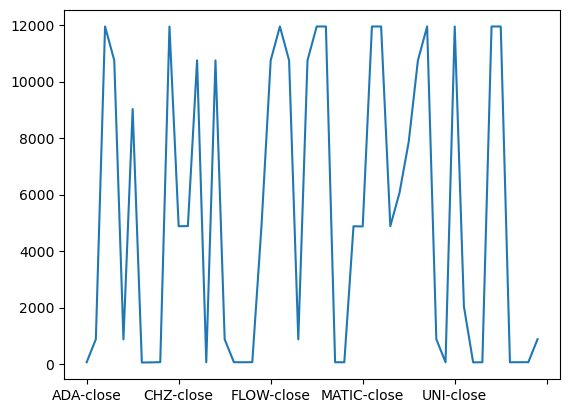

In [4]:
cnt_na = VisualEDA.CountNa(table[ColSelector(table, series=['close'])])
_ = VisualEDA.ReportNa(cnt_na)
cnt_na[cnt_na > 0]

50 out of all variables have NaN.
5 variables with the most NaN:

 LDO-volume      11950
LEO-volume      11950
STETH-volume    11950
FRAX-volume     11950
OKB-volume      11950
dtype: int64


ADA-volume         62
ALGO-volume       879
APE-volume      11950
ATOM-volume     10750
AVAX-volume       873
AXS-volume       9028
BCH-volume         55
BNB-volume         58
BTC-volume         66
BUSD-volume     11950
CHZ-volume       4879
CRO-volume       4884
DAI-volume      10750
DOGE-volume        62
DOT-volume      10749
EGLD-volume       874
EOS-volume         65
ETC-volume         63
ETH-volume         67
FIL-volume       4881
FLOW-volume     10749
FRAX-volume     11950
FTT-volume      10749
HBAR-volume       874
ICP-volume      10750
LDO-volume      11950
LEO-volume      11950
LINK-volume        63
LTC-volume         63
MANA-volume      4877
MATIC-volume     4871
NEAR-volume     11950
OKB-volume      11950
QNT-volume       4881
SAND-volume      6065
SHIB-volume      7866
SOL-volume      10750
STETH-volume    11950
THETA-volume      880
TRX-volume         64
UNI-volume      11950
USDC-volume      2034
USDT-volume        60
VET-volume         62
WBTC-volume     11950
XCN-volume

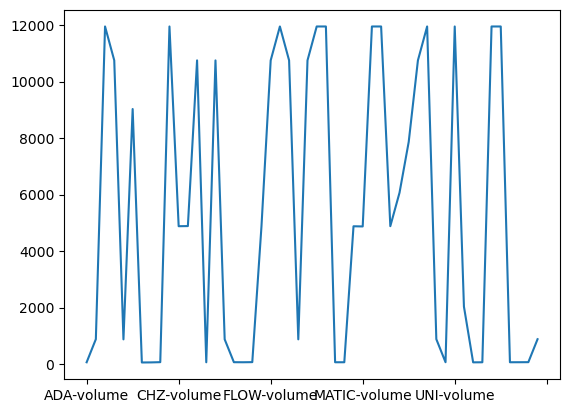

In [5]:
cnt_na = VisualEDA.CountNa(table[ColSelector(table, series=['volume'])])
_ = VisualEDA.ReportNa(cnt_na)
cnt_na[cnt_na > 0]

## Outlier

In [6]:
ret = table[ColSelector(table, series=['close'])].pct_change()
ret

,ADA-close,ALGO-close,APE-close,ATOM-close,AVAX-close,AXS-close,BCH-close,BNB-close,BTC-close,BUSD-close,...,UNI-close,USDC-close,USDT-close,VET-close,WBTC-close,XCN-close,XLM-close,XMR-close,XRP-close,XTZ-close
2020-09-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-26 01:00:00+00:00,0.007708,NaN,NaN,NaN,NaN,NaN,0.002272,0.004146,0.002983,NaN,...,NaN,NaN,-0.000331,0.008554,NaN,NaN,0.013789,-0.003654,0.003996,NaN
2020-09-26 02:00:00+00:00,-0.022390,NaN,NaN,NaN,NaN,NaN,0.001462,-0.000214,0.001411,NaN,...,NaN,NaN,-0.000413,-0.003967,NaN,NaN,-0.007721,-0.000868,0.001082,NaN
2020-09-26 03:00:00+00:00,-0.012453,NaN,NaN,NaN,NaN,NaN,-0.000470,0.000733,0.000122,NaN,...,NaN,NaN,0.000885,0.006491,NaN,NaN,-0.003446,0.013371,-0.000133,NaN
2020-09-26 04:00:00+00:00,-0.002717,NaN,NaN,NaN,NaN,NaN,-0.000469,0.000065,0.001383,NaN,...,NaN,NaN,-0.000964,-0.004019,NaN,NaN,0.004056,-0.005701,-0.001751,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25 00:00:00+00:00,0.005574,0.023603,0.0,0.005551,0.002851,0.008902,-0.000388,-0.001241,0.001259,0.000782,...,0.001220,0.000025,-0.000022,0.004013,0.001877,0.001220,0.001405,0.006206,-0.007079,0.009526
2022-09-25 01:00:00+00:00,-0.002329,-0.006170,0.0,0.001124,0.003868,-0.006713,-0.009643,0.001931,0.000494,0.000244,...,0.000522,-0.000093,0.000020,0.000683,0.000321,0.000523,0.003887,-0.002742,-0.005800,-0.003354
2022-09-25 02:00:00+00:00,0.001732,-0.014492,0.0,0.002889,-0.003900,0.005982,0.000012,0.000894,-0.000934,-0.000768,...,-0.000900,0.000077,0.000003,-0.001911,-0.000388,-0.000900,-0.004169,0.002149,-0.004802,0.004099
2022-09-25 03:00:00+00:00,0.005423,0.003592,0.0,0.006482,0.006400,0.006322,0.003617,0.002067,0.004757,0.000882,...,0.004592,-0.000025,0.000007,0.005619,0.003539,0.004592,0.002787,0.004161,0.012105,0.003640


<AxesSubplot:>

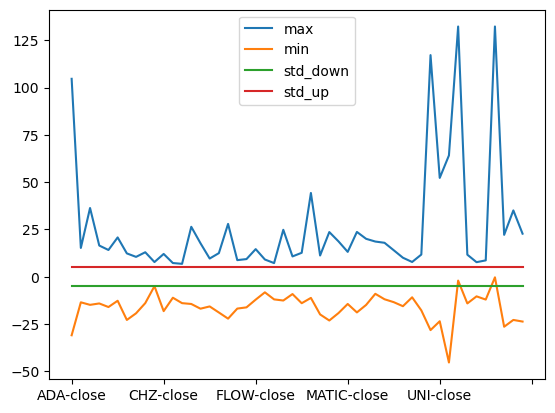

In [9]:
VisualEDA.OutlierPlot(ret, n_std=5)

Highest outlier percentage defined by >= 5 std is  0.0058.
Lowest outlier percentage defined by >= 5 std is  0.0001.

5 variables with largest percentage of outliers:

DOGE-close    0.005828
EOS-close     0.004743
XRP-close     0.004628
BCH-close     0.004057
ETC-close     0.004000
dtype: float64


<AxesSubplot:>

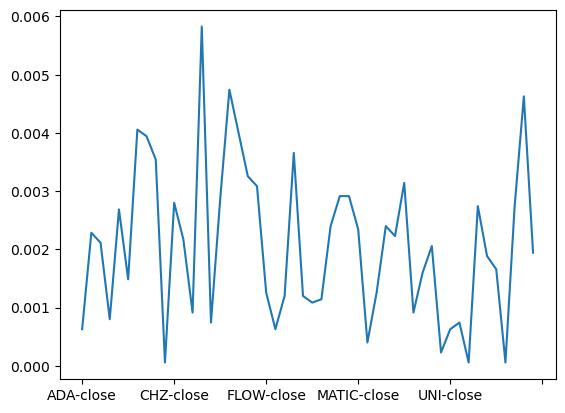

In [10]:
VisualEDA.OutlierPercentage(ret, n_std=5)

## Correlation

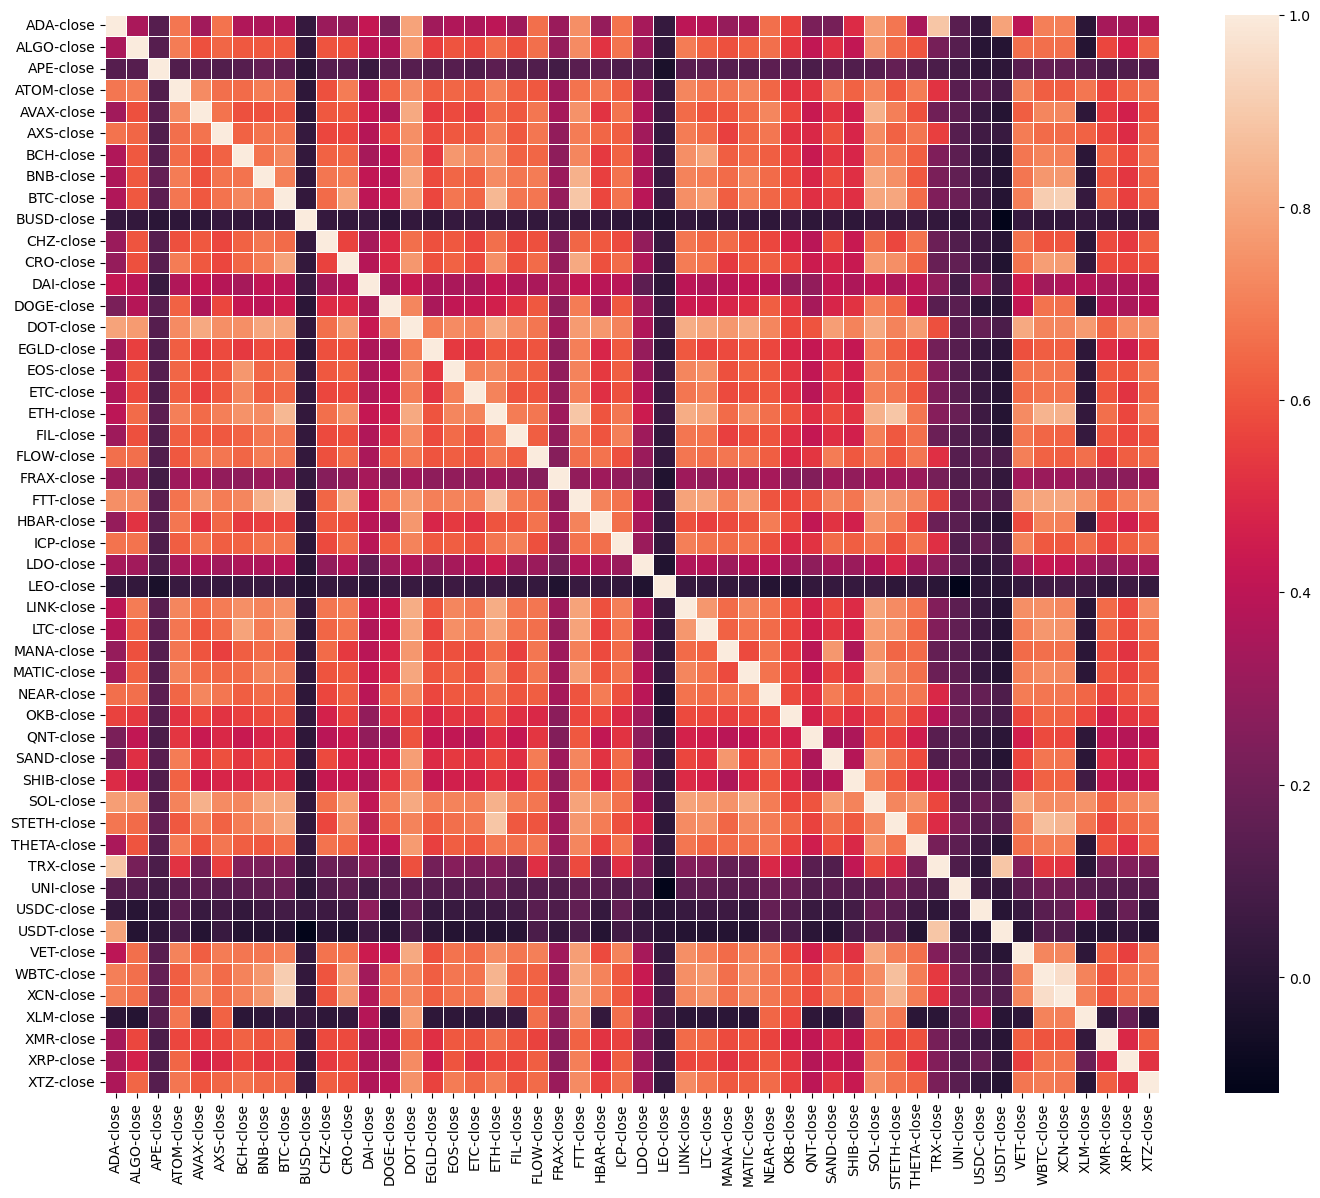

In [13]:
import seaborn as sns

corr_mat = VisualEDA.CorrelationShow(ret)
fig, ax = plt.subplots(figsize=(17, 14))  
_ = sns.heatmap(corr_mat, linewidth=0.5, ax=ax)